In [1]:
import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
pd.set_option('max_rows', 300)
pd.set_option('max_colwidth', 200)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm
tqdm.pandas()
from sklearn.preprocessing import LabelEncoder

import gc

# 用户表

In [2]:
train_user = pd.read_csv('raw_data/train/train_user.csv')
test_user = pd.read_csv('raw_data/test/test_user.csv')

In [3]:
train_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_201908,arpu_201909,arpu_201910,arpu_201911,arpu_201912,arpu_202001,arpu_202002,arpu_202003,label
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a3a835f6cccb78b8ed7554e9ab0fbcd33d19eb6063ce00542dd223cc5cc83c68f07bcf933547b6776b1,绵阳,江油分公司,1,46.06,45.00,45.0,45.00,45.00,45.0,45.0,45.0,0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34de8d361f71d5268fa0851edffd3950e170df1e3846fcf90cc7cc8299be9139a2ac4b5c5e5121d832674,德阳,旌阳分公司,1,79.00,79.20,79.1,79.30,41.40,34.1,59.4,60.0,0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c682d6add360a4332a8ad294d8470d64a73c6e53e8413f0ad93b9ea65afab717e58d312554f33553ee7,成都,金堂分公司,2,18.85,24.45,22.0,21.40,22.15,21.1,61.3,63.0,0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f3627cd4520064b93ec66a72d085a67f0f40eebb9f901072965073e398f04c4ae500a1db4dfb13a972c,成都,高新分公司,2,19.20,29.65,130.4,173.12,19.00,19.0,19.0,23.2,0
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d7706b20520aa11fff0f4ce06203f66758ec0f0e70780e4e258aae6aa1f23439e115528e08eda71ed20,德阳,旌阳分公司,1,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.0,0


In [4]:
test_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_202004
0,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf94e017b4ffd67e26520af18637ad91bde69abd831cc36cdc0c5af5e57bc280f95f79efef7bfa9c6926,成都,金牛分公司,1,9.0
1,5220d4b8429bdba3971a7b46a088c6b8fa6710f40607598ac1219daab6071510b3f66f78637420574dbb2d5488d44de9d4360a644bbe4ec45aaa4b7513bdc886,天府新区,天府直属部门,1,NaN
2,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a868ffdcdc53a865b7a41c386a6f1d6567dd4a710530b933308c77d1ef89f77b580d1983dadd3de162ea,成都,锦江分公司,1,9.0
3,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4fd3a9f9d9bf4a033e791b7199db980b0678020bdf689d719306a5c694ffa47b4ba2bec43ceda68dfc1,绵阳,江油分公司,1,138.7
4,2356dcd6759d50455ddaeed03c838843558e9182d5962f8a4c81a9a178063c49ab988750f795bb6c5462aee5dace2ad9fd18dbb1a6619dbb1e771e9b0f192da9,成都,青羊分公司,2,39.0


In [5]:
tr_u = set(list(train_user.phone_no_m.unique()))
te_u = set(list(test_user.phone_no_m.unique()))

tr_u & te_u

set()

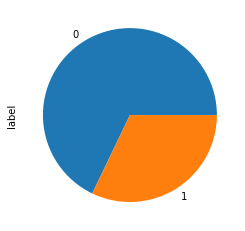

In [6]:
_ = train_user.label.value_counts().plot.pie()

In [7]:
train_user.shape, test_user.shape

((6106, 13), (2045, 5))

In [8]:
# 只取训练集中最后一个月的数据

train_user['arpu_202004'] = train_user['arpu_202003']
train_user.head()

,phone_no_m,city_name,county_name,idcard_cnt,arpu_201908,arpu_201909,arpu_201910,arpu_201911,arpu_201912,arpu_202001,arpu_202002,arpu_202003,label,arpu_202004
0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a3a835f6cccb78b8ed7554e9ab0fbcd33d19eb6063ce00542dd223cc5cc83c68f07bcf933547b6776b1,绵阳,江油分公司,1,46.06,45.00,45.0,45.00,45.00,45.0,45.0,45.0,0,45.0
1,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34de8d361f71d5268fa0851edffd3950e170df1e3846fcf90cc7cc8299be9139a2ac4b5c5e5121d832674,德阳,旌阳分公司,1,79.00,79.20,79.1,79.30,41.40,34.1,59.4,60.0,0,60.0
2,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c682d6add360a4332a8ad294d8470d64a73c6e53e8413f0ad93b9ea65afab717e58d312554f33553ee7,成都,金堂分公司,2,18.85,24.45,22.0,21.40,22.15,21.1,61.3,63.0,0,63.0
3,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f3627cd4520064b93ec66a72d085a67f0f40eebb9f901072965073e398f04c4ae500a1db4dfb13a972c,成都,高新分公司,2,19.20,29.65,130.4,173.12,19.00,19.0,19.0,23.2,0,23.2
4,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d7706b20520aa11fff0f4ce06203f66758ec0f0e70780e4e258aae6aa1f23439e115528e08eda71ed20,德阳,旌阳分公司,1,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.0,0,50.0


In [9]:
train_user.drop(['arpu_201908', 'arpu_201909', 'arpu_201910', 'arpu_201911',
                 'arpu_201912', 'arpu_202001', 'arpu_202002', 'arpu_202003'], axis=1, inplace=True)

## 标签编码

In [10]:
df_user = pd.concat([train_user, test_user])

for f in tqdm(['city_name', 'county_name']):
    lbl = LabelEncoder()
    df_user[f] = df_user[f].fillna('NA')
    df_user[f] = lbl.fit_transform(df_user[f].astype(str))
    
df_user.head()

100%|██████████| 2/2 [00:00<00:00, 208.86it/s]


,arpu_202004,city_name,county_name,idcard_cnt,label,phone_no_m
0,45.0,16,97,1,0.0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a3a835f6cccb78b8ed7554e9ab0fbcd33d19eb6063ce00542dd223cc5cc83c68f07bcf933547b6776b1
1,60.0,10,82,1,0.0,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34de8d361f71d5268fa0851edffd3950e170df1e3846fcf90cc7cc8299be9139a2ac4b5c5e5121d832674
2,63.0,11,160,2,0.0,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c682d6add360a4332a8ad294d8470d64a73c6e53e8413f0ad93b9ea65afab717e58d312554f33553ee7
3,23.2,11,181,2,0.0,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f3627cd4520064b93ec66a72d085a67f0f40eebb9f901072965073e398f04c4ae500a1db4dfb13a972c
4,50.0,10,82,1,0.0,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d7706b20520aa11fff0f4ce06203f66758ec0f0e70780e4e258aae6aa1f23439e115528e08eda71ed20


# 通话表

In [11]:
train_voc = pd.read_csv('raw_data/train/train_voc.csv')
test_voc = pd.read_csv('raw_data/test/test_voc.csv')

train_voc['start_datetime'] = train_voc['start_datetime'].astype('datetime64')
test_voc['start_datetime'] = test_voc['start_datetime'].astype('datetime64')

In [12]:
# 同样只取最后一个月的数据

train_voc = train_voc[train_voc['start_datetime'] >= '2020-03-01 00:00:00']
train_voc = train_voc.reset_index(drop=True)

df_voc = pd.concat([train_voc, test_voc])

In [13]:
# 时间切割

df_voc['voc_day'] = df_voc['start_datetime'].dt.day
df_voc['voc_hour'] = df_voc['start_datetime'].dt.hour
df_voc['voc_ts'] = pd.to_timedelta(df_voc['start_datetime'], unit='ns').dt.total_seconds().astype(int)

df_voc = df_voc.sort_values(by='voc_ts').reset_index(drop=True)

In [14]:
# 一天内通话统计量

df_voc['voc_day_count'] = df_voc.groupby(['phone_no_m', 'voc_day'])['phone_no_m'].transform('count')
df_voc['voc_day_count_max'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('max')
df_voc['voc_day_count_min'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('min')
df_voc['voc_day_count_mean'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('mean')
df_voc['voc_day_count_std'] = df_voc.groupby('phone_no_m')['voc_day_count'].transform('std')

del df_voc['voc_day_count']

In [15]:
# 一小时内通话统计量

df_voc['voc_hour_count'] = df_voc.groupby(['phone_no_m', 'voc_hour'])['phone_no_m'].transform('count')
df_voc['voc_hour_count_max'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('max')
df_voc['voc_hour_count_min'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('min')
df_voc['voc_hour_count_mean'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('mean')
df_voc['voc_hour_count_std'] = df_voc.groupby('phone_no_m')['voc_hour_count'].transform('std')

del df_voc['voc_hour_count']

In [16]:
# 总量

df_voc['voc_count'] = df_voc.groupby('phone_no_m')['phone_no_m'].transform('count')

In [17]:
df_voc.head()

,phone_no_m,opposite_no_m,calltype_id,start_datetime,call_dur,city_name,county_name,imei_m,voc_day,voc_hour,voc_ts,voc_day_count_max,voc_day_count_min,voc_day_count_mean,voc_day_count_std,voc_hour_count_max,voc_hour_count_min,voc_hour_count_mean,voc_hour_count_std,voc_count
0,1143237c02511244c4c9d8b1ca77c19f79b805a8577f3e62a84c8bc4359c930497a2363986cc3421912ee4589fb079ccbc3be3c330a6dd22b594a3433c9b414a,d7196a9499c13ce27d4c70ccc1576ebef915caf602a1ce2cb0b7defd20c7a246423cb2c3508418e930fa31242787bcc1428c4e18f2fd81b796fe629615825ec3,1,2020-03-01 00:00:03,69,雅安,天全县,2a00a56a28c548e519e2e406bfdf7e2d6871207167a74378cbb43682aedbeb36e77c1db898be68683b4c9a028f87cb49ad8f827f248944c2a1ee839674d7aaae,1,0,1583020803,32,1,13.351562,8.482129,33,1,20.914062,8.505156,256
1,23e7b33b67d844031bcb1b6d4d4323786d0ff72276d682bd39b71217fed16278a7e8895feb0f96552553cef0018df935b9171b2e68cc92761b420dcdb6575c82,f40eb0b09ad309078f33940d5b5cddbf87bd3dd9433f6d780b88777b0c98babfe410cdd771af79cb0a0335fca1f5d1211fa1743654fb08675b3c675b269a642a,1,2020-03-01 00:01:02,21,NaN,NaN,2437a08877d9e9dfe2decdc144952e20cbda3ff17902ba0a85cced4d76c75c16d40d5804f99364bea9e7f00654721c8bbb2a8bccbb951f6f2c996a5396b5289b,1,0,1583020862,44,1,18.729730,11.004060,46,1,28.803440,12.130883,407
2,333623561fc36866d7afcd9574c1572ecd7c9c68b9e372cd9c784baf0d9f4a3978c0ca98f57f912b0289f245046e305ac81755126d9df92883e7103859eb851c,a41fbfe0210cfa0305d678111a03a2049fc5e91073cc8a46d2ac46eb5a535b8cca8d19d2bc50435adcdc3f6de4de84ec15a216c9a1cc6d2e84f099fe05a20bce,1,2020-03-01 00:02:25,103,成都,武侯区,127fd4d72ea49c9428766adb8e68f0dbb822668b319f20f1b39a1f914746d73d9b0acfb4cec0fee16fd42661090eb991ad7ba41200acbd7af216f12174fbb74d,1,0,1583020945,72,1,33.888889,23.026947,38,1,27.940171,8.852869,468
3,333623561fc36866d7afcd9574c1572ecd7c9c68b9e372cd9c784baf0d9f4a3978c0ca98f57f912b0289f245046e305ac81755126d9df92883e7103859eb851c,a41fbfe0210cfa0305d678111a03a2049fc5e91073cc8a46d2ac46eb5a535b8cca8d19d2bc50435adcdc3f6de4de84ec15a216c9a1cc6d2e84f099fe05a20bce,1,2020-03-01 00:02:25,103,成都,武侯区,127fd4d72ea49c9428766adb8e68f0dbb822668b319f20f1b39a1f914746d73d9b0acfb4cec0fee16fd42661090eb991ad7ba41200acbd7af216f12174fbb74d,1,0,1583020945,72,1,33.888889,23.026947,38,1,27.940171,8.852869,468
4,23e7b33b67d844031bcb1b6d4d4323786d0ff72276d682bd39b71217fed16278a7e8895feb0f96552553cef0018df935b9171b2e68cc92761b420dcdb6575c82,f40eb0b09ad309078f33940d5b5cddbf87bd3dd9433f6d780b88777b0c98babfe410cdd771af79cb0a0335fca1f5d1211fa1743654fb08675b3c675b269a642a,1,2020-03-01 00:03:15,1,NaN,NaN,2437a08877d9e9dfe2decdc144952e20cbda3ff17902ba0a85cced4d76c75c16d40d5804f99364bea9e7f00654721c8bbb2a8bccbb951f6f2c996a5396b5289b,1,0,1583020995,44,1,18.729730,11.004060,46,1,28.803440,12.130883,407


# 短信表

In [18]:
train_sms = pd.read_csv('raw_data/train/train_sms.csv')
test_sms = pd.read_csv('raw_data/test/test_sms.csv')

train_sms['request_datetime'] = train_sms['request_datetime'].astype('datetime64')
test_sms['request_datetime'] = test_sms['request_datetime'].astype('datetime64')

In [19]:
# 同样只取最后一个月的数据

train_sms = train_sms[train_sms['request_datetime'] >= '2020-03-01 00:00:00']
train_sms = train_sms.reset_index(drop=True)

df_sms = pd.concat([train_sms, test_sms])

In [20]:
# 时间切割

df_sms['sms_day'] = df_sms['request_datetime'].dt.day
df_sms['sms_hour'] = df_sms['request_datetime'].dt.hour
df_sms['sms_ts'] = pd.to_timedelta(df_sms['request_datetime'], unit='ns').dt.total_seconds().astype(int)

df_sms = df_sms.sort_values(by='sms_ts').reset_index(drop=True)

In [21]:
# 一天内短信统计量

df_sms['sms_day_count'] = df_sms.groupby(['phone_no_m', 'sms_day'])['phone_no_m'].transform('count')
df_sms['sms_day_count_max'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('max')
df_sms['sms_day_count_min'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('min')
df_sms['sms_day_count_mean'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('mean')
df_sms['sms_day_count_std'] = df_sms.groupby('phone_no_m')['sms_day_count'].transform('std')

del df_sms['sms_day_count']

In [22]:
# 一小时内短信统计量

df_sms['sms_hour_count'] = df_sms.groupby(['phone_no_m', 'sms_hour'])['phone_no_m'].transform('count')
df_sms['sms_hour_count_max'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('max')
df_sms['sms_hour_count_min'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('min')
df_sms['sms_hour_count_mean'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('mean')
df_sms['sms_hour_count_std'] = df_sms.groupby('phone_no_m')['sms_hour_count'].transform('std')

del df_sms['sms_hour_count']

In [23]:
# 总量

df_sms['sms_count'] = df_sms.groupby('phone_no_m')['phone_no_m'].transform('count')

In [24]:
df_sms.head()

,phone_no_m,opposite_no_m,calltype_id,request_datetime,sms_day,sms_hour,sms_ts,sms_day_count_max,sms_day_count_min,sms_day_count_mean,sms_day_count_std,sms_hour_count_max,sms_hour_count_min,sms_hour_count_mean,sms_hour_count_std,sms_count
0,05b14594c2dfe7cecbf8b8e87220e92b8e7d7cfd81a9483262eea5d3347a314a154ab2902a7becb8b7657ef6171a9a6c095f2529e17eaced79c1b3f87ffb9dff,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f06ee093a91c4a41385d46579107a443eee3ec0ce2339bcea4152a996ca8cf0b2cc846eb2acc9cc241b,2,2020-03-01 00:00:27,1,0,1583020827,74,8,41.424424,16.974697,126,1,63.134134,30.640949,999
1,05b14594c2dfe7cecbf8b8e87220e92b8e7d7cfd81a9483262eea5d3347a314a154ab2902a7becb8b7657ef6171a9a6c095f2529e17eaced79c1b3f87ffb9dff,df22edbc0e3dd6bc4f2f453e687b743e8442a54834b64f06ee093a91c4a41385d46579107a443eee3ec0ce2339bcea4152a996ca8cf0b2cc846eb2acc9cc241b,2,2020-03-01 00:00:27,1,0,1583020827,74,8,41.424424,16.974697,126,1,63.134134,30.640949,999
2,279b5823890d1af8035dadb33f6e8471fdc2832e907d1aa00c5f5bf47a7fbf451868c557233c679aa3fad7ba068010c059491a3c9029136a3e14e800cf47239c,d73a454ed717461675c5a243fa7bab9892640643b4a0855fabf86231ec6d274df9511cc4aa305bfc80592d3c6b0d20446d7f1fd7e2ac0f0436f57c409469fd2a,1,2020-03-01 00:00:55,1,0,1583020855,182,1,78.667954,77.305629,106,1,49.250965,33.940652,518
3,279b5823890d1af8035dadb33f6e8471fdc2832e907d1aa00c5f5bf47a7fbf451868c557233c679aa3fad7ba068010c059491a3c9029136a3e14e800cf47239c,d73a454ed717461675c5a243fa7bab9892640643b4a0855fabf86231ec6d274df9511cc4aa305bfc80592d3c6b0d20446d7f1fd7e2ac0f0436f57c409469fd2a,1,2020-03-01 00:00:55,1,0,1583020855,182,1,78.667954,77.305629,106,1,49.250965,33.940652,518
4,279b5823890d1af8035dadb33f6e8471fdc2832e907d1aa00c5f5bf47a7fbf451868c557233c679aa3fad7ba068010c059491a3c9029136a3e14e800cf47239c,d73a454ed717461675c5a243fa7bab9892640643b4a0855fabf86231ec6d274df9511cc4aa305bfc80592d3c6b0d20446d7f1fd7e2ac0f0436f57c409469fd2a,1,2020-03-01 00:01:20,1,0,1583020880,182,1,78.667954,77.305629,106,1,49.250965,33.940652,518


# 应用表

In [25]:
train_app = pd.read_csv('raw_data/train/train_app.csv')
test_app = pd.read_csv('raw_data/test/test_app.csv')

In [26]:
# 同样只取最后一个月

train_app = train_app[train_app['month_id'] == '2020-03']
train_app = train_app.reset_index(drop=True)

df_app = pd.concat([train_app, test_app])

In [27]:
# 流量统计

df_app['total_flow'] = df_app.groupby('phone_no_m')['flow'].transform('sum')
df_app['flow_max'] = df_app.groupby('phone_no_m')['flow'].transform('max')
df_app['flow_min'] = df_app.groupby('phone_no_m')['flow'].transform('min')
df_app['flow_mean'] = df_app.groupby('phone_no_m')['flow'].transform('mean')
df_app['flow_std'] = df_app.groupby('phone_no_m')['flow'].transform('std')

# 应用数
df_app['app_count'] = df_app.groupby('phone_no_m')['phone_no_m'].transform('count')

In [28]:
df_app.head()

,phone_no_m,busi_name,flow,month_id,total_flow,flow_max,flow_min,flow_mean,flow_std,app_count
0,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a5a44c16f243922f1884e84ce9a910dfee5be7b1f8b2ae2784cc6ee1f65222f841a84acef2b1f11cac2,NaN,125.060604,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
1,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a5a44c16f243922f1884e84ce9a910dfee5be7b1f8b2ae2784cc6ee1f65222f841a84acef2b1f11cac2,QQ,7.247598,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
2,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a5a44c16f243922f1884e84ce9a910dfee5be7b1f8b2ae2784cc6ee1f65222f841a84acef2b1f11cac2,旺信,0.008341,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
3,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a5a44c16f243922f1884e84ce9a910dfee5be7b1f8b2ae2784cc6ee1f65222f841a84acef2b1f11cac2,微信,584.027821,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93
4,229a0f324de3c54b4cc4c82dafbf78ee5874fe491e4d9a5a44c16f243922f1884e84ce9a910dfee5be7b1f8b2ae2784cc6ee1f65222f841a84acef2b1f11cac2,起点读书,5.342432,2020-03,5189.21207,2000.995233,0.00074,55.797979,250.141054,93


# 合并

In [29]:
df_user.shape, df_voc.shape, df_sms.shape, df_app.shape

((8151, 6), (985666, 20), (1319506, 16), (512100, 10))

In [30]:
df_voc = df_voc[['phone_no_m', 'calltype_id', 
                 'call_dur', 'voc_day', 'voc_hour',
                 'voc_day_count_max', 'voc_day_count_min', 'voc_day_count_mean', 'voc_day_count_std', 
                 'voc_hour_count_max', 'voc_hour_count_min', 'voc_hour_count_mean', 'voc_hour_count_std',
                 'voc_count']].drop_duplicates(subset=['phone_no_m'])

In [31]:
df_sms = df_sms[['phone_no_m', 'sms_day', 'sms_hour', 
                 'sms_day_count_max', 'sms_day_count_min', 'sms_day_count_mean', 'sms_day_count_std', 
                 'sms_hour_count_max', 'sms_hour_count_min', 'sms_hour_count_mean', 'sms_hour_count_std',
                 'sms_count']].drop_duplicates(subset=['phone_no_m'])

In [32]:
df_app = df_app[['phone_no_m', 'total_flow', 'flow_max', 'flow_min',
                 'flow_mean', 'flow_std', 'app_count']].drop_duplicates(subset=['phone_no_m'])

In [33]:
df = pd.merge(df_user, df_voc, how='left', on='phone_no_m')
df = pd.merge(df, df_sms, how='left', on='phone_no_m')
df = pd.merge(df, df_app, how='left', on='phone_no_m')

df.head()

,arpu_202004,city_name,county_name,idcard_cnt,label,phone_no_m,calltype_id,call_dur,voc_day,voc_hour,voc_day_count_max,voc_day_count_min,voc_day_count_mean,voc_day_count_std,voc_hour_count_max,voc_hour_count_min,voc_hour_count_mean,voc_hour_count_std,voc_count,sms_day,sms_hour,sms_day_count_max,sms_day_count_min,sms_day_count_mean,sms_day_count_std,sms_hour_count_max,sms_hour_count_min,sms_hour_count_mean,sms_hour_count_std,sms_count,total_flow,flow_max,flow_min,flow_mean,flow_std,app_count
0,45.0,16,97,1,0.0,672ddbf02a5544d32e4ecc9433b1981bffe23bf912273a3a835f6cccb78b8ed7554e9ab0fbcd33d19eb6063ce00542dd223cc5cc83c68f07bcf933547b6776b1,1.0,1.0,1.0,10.0,12.0,1.0,4.971831,3.601475,11.0,1.0,6.042254,3.025778,71.0,1.0,7.0,16.0,1.0,7.089552,4.362283,24.0,1.0,12.059701,6.588622,134.0,168.124505,99.590643,0.000456,2.849568,13.173569,59.0
1,60.0,10,82,1,0.0,5e1272273e041e82cb275ae877710be98cdaf5b0a8f34de8d361f71d5268fa0851edffd3950e170df1e3846fcf90cc7cc8299be9139a2ac4b5c5e5121d832674,2.0,1.0,6.0,10.0,2.0,1.0,1.363636,0.504525,3.0,1.0,1.727273,0.904534,11.0,1.0,8.0,22.0,1.0,14.142857,4.892586,71.0,1.0,41.112045,23.306550,357.0,10088.555221,2537.237967,0.001075,53.662528,237.544176,188.0
2,63.0,11,160,2,0.0,eaab3472ec87b076e69e6e8bb62b14341638fc63661a6c682d6add360a4332a8ad294d8470d64a73c6e53e8413f0ad93b9ea65afab717e58d312554f33553ee7,1.0,125.0,1.0,15.0,25.0,1.0,11.151515,5.496608,36.0,1.0,22.818182,9.387167,264.0,1.0,9.0,32.0,3.0,12.783394,8.035024,44.0,1.0,25.397112,12.424601,277.0,357.531875,74.788056,0.000526,3.928922,12.155846,91.0
3,23.2,11,181,2,0.0,0ce1bb415704178bf44e9c9b431a39b083a132c8e6d99f3627cd4520064b93ec66a72d085a67f0f40eebb9f901072965073e398f04c4ae500a1db4dfb13a972c,1.0,29.0,1.0,13.0,37.0,1.0,25.006885,8.531885,104.0,1.0,67.137694,28.927287,581.0,1.0,7.0,37.0,1.0,23.635452,7.869170,88.0,2.0,54.076923,21.127533,598.0,2.176389,1.118252,0.000553,0.435278,0.449543,5.0
4,50.0,10,82,1,0.0,28b87f35f63f65096a53e3a4c97eaffd4a6c43ffa7e92d7706b20520aa11fff0f4ce06203f66758ec0f0e70780e4e258aae6aa1f23439e115528e08eda71ed20,1.0,65.0,4.0,18.0,1.0,1.0,1.000000,0.000000,2.0,1.0,1.666667,0.516398,6.0,1.0,11.0,13.0,1.0,5.870588,3.750518,14.0,1.0,9.352941,3.816337,85.0,3303.071922,1684.194232,0.000098,27.525599,168.147333,120.0


In [34]:
df_train = df[df.label.notna()]
df_test = df[df.label.isna()]

df_train.shape, df_test.shape

((6106, 36), (2045, 36))

# 建模

In [35]:
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score

In [36]:
ycol = 'label'
feature_names = list(
    filter(lambda x: x not in [ycol, 'phone_no_m'], df_train.columns))

model = lgb.LGBMClassifier(objective='binary',
                           boosting_type='gbdt',
                           tree_learner='serial',
                           num_leaves=64,
                           max_depth=8,
                           learning_rate=0.1,
                           n_estimators=10000,
                           subsample=0.8,
                           feature_fraction=0.6,
                           reg_alpha=10,
                           reg_lambda=12,
                           random_state=2020,
                           is_unbalance=True,
                           metric='auc')


oof = []
prediction = df_test[['phone_no_m']]
prediction[ycol] = 0
df_importance_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)
for fold_id, (trn_idx, val_idx) in enumerate(kfold.split(df_train[feature_names], df_train[ycol])):
    X_train = df_train.iloc[trn_idx][feature_names]
    Y_train = df_train.iloc[trn_idx][ycol]

    X_val = df_train.iloc[val_idx][feature_names]
    Y_val = df_train.iloc[val_idx][ycol]

    print('\nFold_{} Training ================================\n'.format(fold_id+1))

    lgb_model = model.fit(X_train,
                          Y_train,
                          eval_names=['train', 'valid'],
                          eval_set=[(X_train, Y_train), (X_val, Y_val)],
                          verbose=100,
                          eval_metric='auc',
                          early_stopping_rounds=50)

    pred_val = lgb_model.predict(
        X_val, num_iteration=lgb_model.best_iteration_)
    df_oof = df_train.iloc[val_idx][['phone_no_m', ycol]].copy()
    df_oof['pred'] = pred_val
    oof.append(df_oof)

    pred_test = lgb_model.predict(
        df_test[feature_names], num_iteration=lgb_model.best_iteration_)
    prediction[ycol] += pred_test / kfold.n_splits

    df_importance = pd.DataFrame({
        'column': feature_names,
        'importance': lgb_model.feature_importances_,
    })
    df_importance_list.append(df_importance)

    del lgb_model, pred_val, pred_test, X_train, Y_train, X_val, Y_val
    gc.collect()


Fold_1 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.992324	valid's auc: 0.938446
Early stopping, best iteration is:
[124]	train's auc: 0.994394	valid's auc: 0.939824

Fold_2 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.992926	valid's auc: 0.936448
Early stopping, best iteration is:
[57]	train's auc: 0.983997	valid's auc: 0.939062

Fold_3 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.992105	valid's auc: 0.951032
Early stopping, best iteration is:
[123]	train's auc: 0.994264	valid's auc: 0.951417

Fold_4 Training ================================

Training until validation scores don't improve for 50 rounds
[100]	train's auc: 0.992364	valid's auc: 0.954768
Early stopping, best iteration is:
[149]	train's auc: 0.995512	valid's auc: 0.956088

Fold_5 Train

In [37]:
df_importance = pd.concat(df_importance_list)
df_importance = df_importance.groupby(['column'])['importance'].agg(
    'mean').sort_values(ascending=False).reset_index()
df_importance

,column,importance
0,arpu_202004,201.8
1,call_dur,173.4
2,voc_day_count_mean,161.4
3,sms_day_count_mean,159.4
4,county_name,159.0
5,app_count,149.4
6,flow_min,137.4
7,voc_day_count_std,128.4
8,sms_day_count_std,121.0
9,flow_mean,115.0


In [38]:
df_oof = pd.concat(oof)
f1 = f1_score(df_oof[ycol], df_oof['pred'])
print('f1:', f1)

f1: 0.8765934363981557


In [39]:
sub = prediction.copy(deep=True)
sub['label'] = sub['label'].apply(lambda x: 1 if x>0 else 0)
sub.head()

,phone_no_m,label
6106,22d522340df77e2252c1a4d92b4bcb00d515e36f3ec6bf94e017b4ffd67e26520af18637ad91bde69abd831cc36cdc0c5af5e57bc280f95f79efef7bfa9c6926,0
6107,5220d4b8429bdba3971a7b46a088c6b8fa6710f40607598ac1219daab6071510b3f66f78637420574dbb2d5488d44de9d4360a644bbe4ec45aaa4b7513bdc886,0
6108,7d19dd2b50ced56f03d23bf928cf34dc570a48525571a868ffdcdc53a865b7a41c386a6f1d6567dd4a710530b933308c77d1ef89f77b580d1983dadd3de162ea,0
6109,134a4a591185c9d3788021896dcfc235e9e0a6a1e3f8a4fd3a9f9d9bf4a033e791b7199db980b0678020bdf689d719306a5c694ffa47b4ba2bec43ceda68dfc1,0
6110,2356dcd6759d50455ddaeed03c838843558e9182d5962f8a4c81a9a178063c49ab988750f795bb6c5462aee5dace2ad9fd18dbb1a6619dbb1e771e9b0f192da9,0


In [40]:
sub.label.value_counts()

0    1543
1     502
Name: label, dtype: int64

In [41]:
sub.to_csv('submissions/baseline_{}.csv'.format(f1), index=False, encoding='utf-8')